# Part II - (Ford GoBike System Data)
## by (Kimberly Peters)


## Investigation Overview


> In this analysis, I would like to figure that when and where are most trips taken, and what kind of characteristics are in these locations and time periods. The characteristics include rider's attributes (sex, age, and user_type) and duration of trips.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.dropna(inplace=True)
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['duration_sec'] = df['duration_sec'].div(60).round(2)
df.rename(columns={'duration_sec':'duration'}, inplace=True)

In [3]:
#getting hour from start time
df['start_hour'] = df['start_time'].dt.strftime('%H')
#getting day from start time
df['start_day'] = df['start_time'].dt.strftime('%A')
#getting month from start time
df['start_month'] = df['start_time'].dt.strftime('%B')
#changing the user_type, member_gender, and bike_share_for_all_trip to category format
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

In [4]:
#changing the bike_id, start_station_id, and end_station_id to object
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)
#calculating members age
df['member_age'] = 2022 - df['member_birth_year']
#changing type to int
df['member_age'] = df['member_age'].astype(int)
#dropping the member_birth_year column: 
df.drop(columns='member_birth_year', inplace=True)
# Only keep the events where riders were under 67 years of age
df = df.query('member_age <= 67')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> **What hour and day of the week that has most trips?**

> It is clear that thursday and tuesday is the best day for the riders to ride the bikes which are work days and least days is sunday and saturday which are weekends.

> Peak hours are 7-9 AM and 4-6 PM. The number of trips is very low between 00:00 to 05:00

> Since we have higher ride counts on weekdays and 2 peak hours, maybe the users are students or workers going to school or work and coming back during those peak hours.


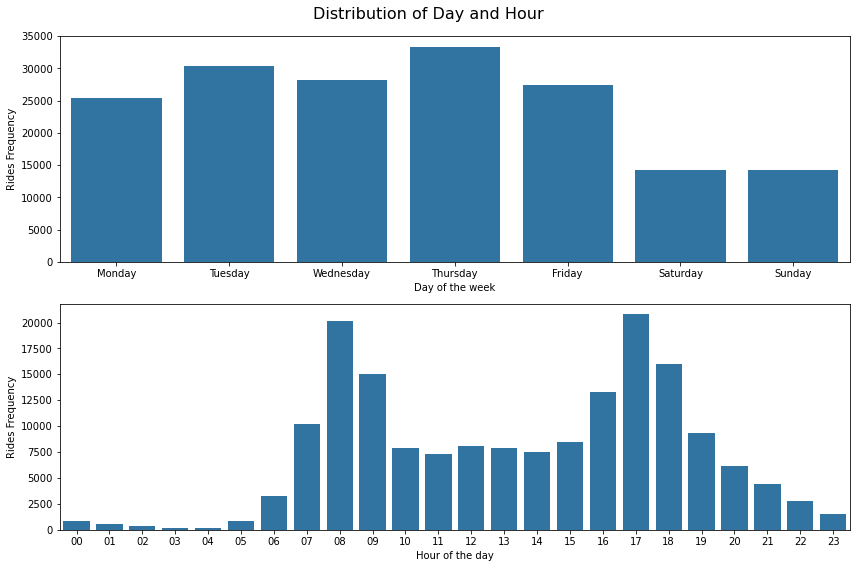

In [6]:
# set the default color
default_color = sb.color_palette()[0]
#function to reduce repetitive code
def xyt(xlab,ylab,tit):
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(tit, size = 16)
    plt.show();
#ordering the days of the week
day_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#set subplots
fig, ax = plt.subplots(nrows = 2, figsize = [12, 8])

#time characteristic order
hour_order = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
              '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

#plot the Day, Month and Hour
sb.countplot(data = df, x = 'start_day', ax = ax[0], color = default_color, order = day_order, label = 'data')
sb.countplot(data = df, x = 'start_hour', ax = ax[1], color = default_color, order = hour_order);

#title and labels
fig.suptitle('Distribution of Day and Hour', size = 16);

for a in ax:
    a.set_ylabel('Rides Frequency')
    
ax[0].set_xlabel('Day of the week')
ax[1].set_xlabel('Hour of the day')

fig.tight_layout();

## (Visualization 2)

> **Which trip duration range has the most occurance?**

> Most of the trips have duration of less than 10 minutes

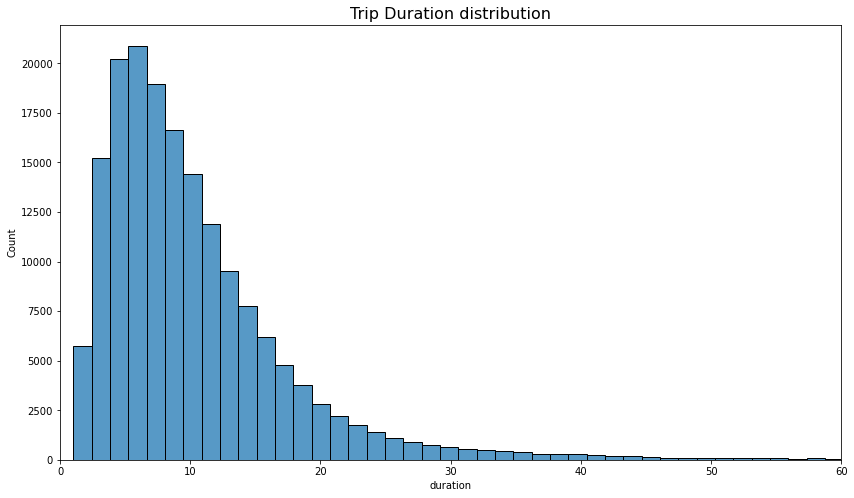

In [7]:
#plotting duration
plt.figure(figsize=(14,8))
plt.xlim(0,60)
plt.title('Trip Duration distribution', size = 16)
sb.histplot(df['duration'], bins=1000);

## (Visualization 3)

> **What is the distribution of user type and member genders?**

> Subcribers have done more number of rides than Customers. As subscribed member ride price is less than casual customers, this might be the reason for more number of rides. Refer [https://en.wikipedia.org/wiki/Bay_Wheels]

> Male riders counts are three times more than the Female riders. Other gender count is lesser when compared to male and female genders

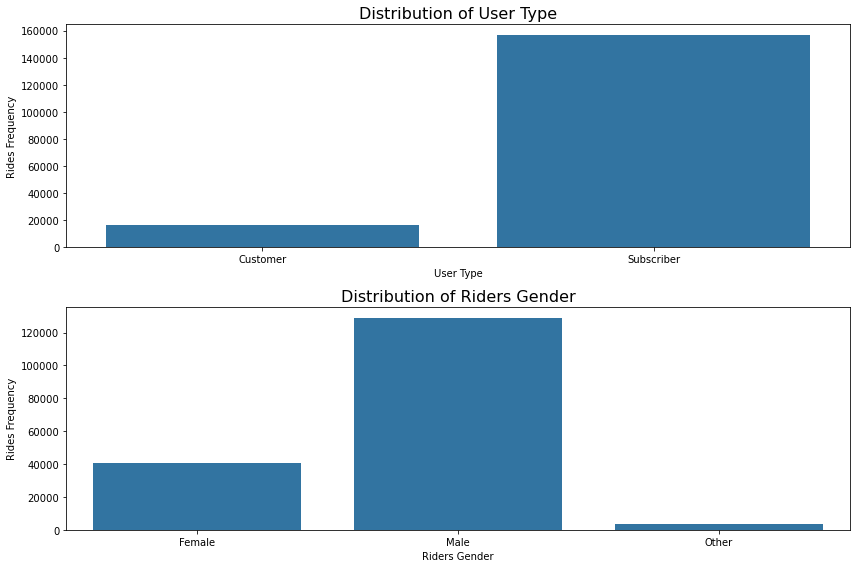

In [8]:
fig, ax = plt.subplots(nrows = 2, figsize = [12,8])
sb.countplot(data = df, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'member_gender', color = default_color, ax = ax[1]);
# title and labels
for a in ax:
    a.set_ylabel('Rides Frequency')
    
ax[0].set_xlabel('User Type')
ax[0].set_title('Distribution of User Type', size = 16)
ax[1].set_xlabel('Riders Gender')
ax[1].set_title('Distribution of Riders Gender', size = 16)
fig.tight_layout();

## (Visualization 4)

> **What day of the week has the most average trips duration?**

> Mean trip duration is almost the same across weekdays with a notable increase in the weekend.

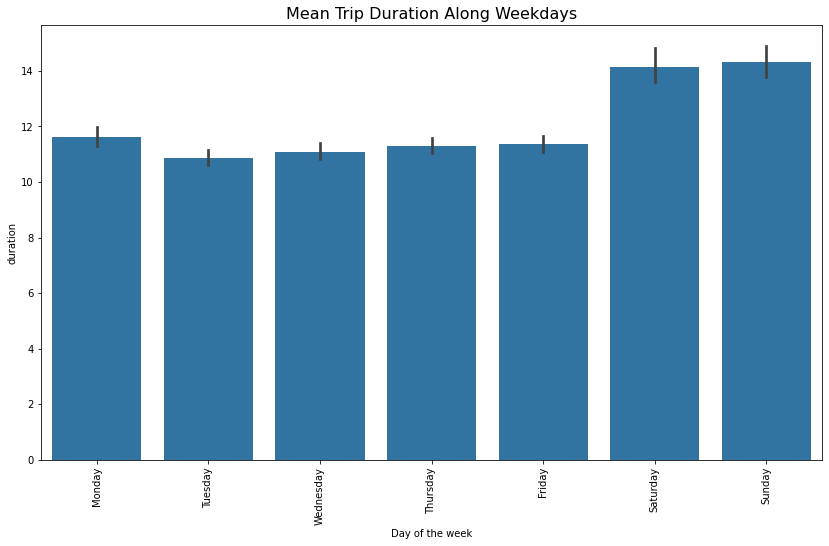

In [9]:
plt.figure(figsize=(14,8))
sb.barplot(data = df, x = 'start_day', y = 'duration', order = day_order, color = default_color)
plt.xlabel("Day of the week")
plt.title("Mean Trip Duration Along Weekdays", size = 16);
plt.xticks(rotation = 90);

## (Visualization 5)

> **What is the mean trip duration by gender, user type and bike sharing for all trips?**

> Average trip duration is highest for "Other" gender category.

> Trip duration is slightly higher for females than males.

> Average trips duration for Customers is double that of Subscribers.

> Cyclists in the "Bike Share for All" program take slightly shorter trips than other Cyclists.

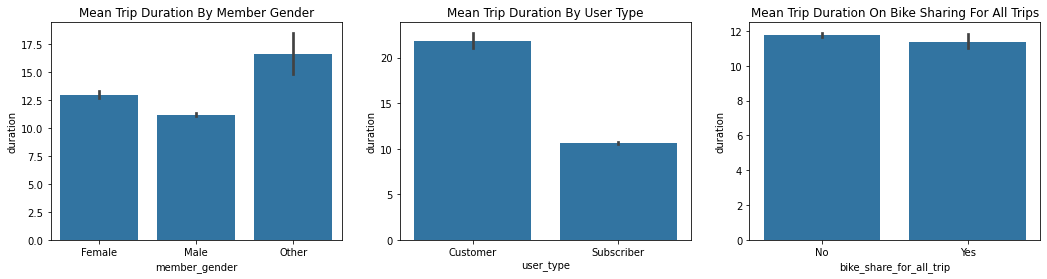

In [10]:
plt.figure(figsize = (24, 4))

plt.subplot(1,4,1)
sb.barplot(data = df, x = 'member_gender', y = 'duration', color = default_color)
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration By Member Gender");

plt.subplot(1,4,2)
sb.barplot(data = df, x = 'user_type', y = 'duration', color = default_color)
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration By User Type");

plt.subplot(1,4,3)
sb.barplot(data = df, x = 'bike_share_for_all_trip', y = 'duration', color = default_color)
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration On Bike Sharing For All Trips");

## (Visualization 6)

> **What is the relationship between Weekdays, Average duration, Bike share for all trips and the User Gender?**

> The plot shows the mean trip duration across weekdays for gender, user type, and Bike Share program. 

> 'Other' gender has the most average trip duration especially on Sundays. 

> Notice the jump for mean duration during the weekend for Customers and Bike Share members.

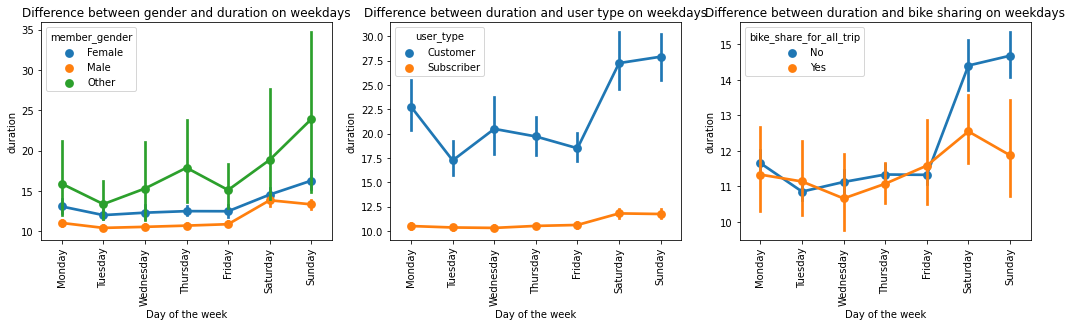

In [11]:
plt.figure(figsize = (24, 4))

plt.subplot(1,4,1)
sb.pointplot(data = df, x = 'start_day', y = 'duration', hue ='member_gender', order = day_order)
plt.xlabel("Day of the week");
plt.title("Difference between gender and duration on weekdays");
plt.xticks(rotation = 90);

plt.subplot(1,4,2)
sb.pointplot(data = df, x = 'start_day', y = 'duration', hue = 'user_type', order = day_order)
plt.xlabel("Day of the week");
plt.title("Difference between duration and user type on weekdays");
plt.xticks(rotation = 90);

plt.subplot(1,4,3)
sb.pointplot(data = df, x = 'start_day', y = 'duration', hue='bike_share_for_all_trip', order = day_order)
plt.xlabel("Day of the week");
plt.title("Difference between duration and bike sharing on weekdays")
plt.xticks(rotation = 90);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
